Ce bloc de code importe plusieurs bibliothèques de Python nécessaires pour l'analyse de données et la création de modèles de classification. Voici ce que font les bibliothèques importées :

sklearn.model_selection : cette bibliothèque fournit des fonctions pour la sélection de modèles, la validation croisée et la sélection de paramètres.

sklearn.linear_model : cette bibliothèque fournit des classes pour la régression linéaire.

sklearn.neural_network : cette bibliothèque fournit des classes pour les réseaux de neurones.

sklearn.neighbors : cette bibliothèque fournit des classes pour la classification kNN.

sklearn.svm : cette bibliothèque fournit des classes pour les machines à vecteurs de support.

sklearn.gaussian_process : cette bibliothèque fournit des classes pour les processus gaussiens.

sklearn.tree : cette bibliothèque fournit des classes pour les arbres de décision.

sklearn.ensemble : cette bibliothèque fournit des classes pour les méthodes d'ensemble, comme Random Forest et AdaBoost.

sklearn.naive_bayes : cette bibliothèque fournit des classes pour la classification bayésienne naïve.

sklearn.discriminant_analysis : cette bibliothèque fournit des classes pour l'analyse discriminante linéaire et quadratique.

sklearn.preprocessing : cette bibliothèque fournit des classes pour la prétraitement des données, telles que la normalisation et la mise à l'échelle.

sklearn.pipeline : cette bibliothèque fournit des classes pour la construction de pipelines de traitement de données.

scipy.signal : cette bibliothèque fournit des fonctions pour le traitement du signal.

tensorflow : cette bibliothèque fournit des classes pour la création de modèles de réseau de neurones.

tensorflow.keras : cette bibliothèque fournit des fonctions pour la création de modèles de réseau de neurones avec Keras.

matplotlib.pyplot : cette bibliothèque fournit des fonctions pour la création de graphiques et de visualisations.

scipy.io : cette bibliothèque fournit des fonctions pour lire et écrire des fichiers MATLAB.

neurokit2 : cette bibliothèque fournit des fonctions pour l'analyse de données psychophysiologiques.

seaborn : cette bibliothèque fournit des fonctions pour la visualisation de données statistiques.

pandas : cette bibliothèque fournit des classes pour la manipulation de données en tableau.

numpy : cette bibliothèque fournit des fonctions pour le calcul numérique.

time : cette bibliothèque fournit des fonctions pour la mesure du temps.

mne : cette bibliothèque fournit des fonctions pour l'analyse de données d'électroencéphalographie (EEG).

In [1]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from scipy import signal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt
import scipy.io as sio

!pip install neurokit2
import neurokit2 as nk

import seaborn as sns

import pandas as pd
import numpy as np
import time
!pip install mne
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.6 MB/s eta 0:00:00


Ce bloc de code permet de monter votre lecteur Google Drive dans Google Colab. Cela vous permet de charger des fichiers à partir de votre lecteur Google Drive directement dans votre environnement Colab.

La fonction drive.mount() prend en paramètre le chemin d'accès au dossier de montage. Une fois que la commande est exécutée, vous serez invité à autoriser l'accès à votre lecteur Google Drive. Lorsque vous aurez donné votre autorisation, le lecteur sera monté et vous pourrez accéder à son contenu à partir de votre environnement Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ce bloc de code charge un fichier de données DREAMERedit.mat à partir du chemin d'accès spécifié dans la variable path en utilisant la fonction sio.loadmat() de la bibliothèque scipy.io.

La fonction sio.loadmat() charge les données à partir d'un fichier MATLAB .mat et les stocke sous forme de dictionnaire Python. La variable raw contient les données chargées à partir du fichier.

In [3]:
path = "/content/drive/My Drive/DREAMER.mat"
raw = sio.loadmat(path)

La section ci-dessous concerne les signaux EEG

# EEG SIGNALS 

Cette fonction effectue un prétraitement sur un signal EEG brut. Le signal est découpé en 12 segments de 640 points de données chacun, puis chaque segment est filtré avec un filtre passe-bas de fréquence de coupure de 40 Hz. Ensuite, la fonction calcule la densité spectrale de puissance (PSD) de chaque segment en utilisant la méthode Welch. Les PSDs sont ensuite utilisées pour calculer la moyenne de la puissance dans les bandes de fréquences theta (4-7.5 Hz), alpha (7.5-13 Hz) et beta (13-20 Hz) pour chaque segment. Ces moyennes sont stockées dans une liste de caractéristiques. La fonction renvoie cette liste de caractéristiques.

In [ ]:
def preprocess_EEG(raw, feature):

  frame = [[0 for x in range(640)] for y in range(12)] 

  for i in range(0,7680):
    j = i//640
    k = i%640
    frame[j][k] = raw[i]
  
  samplingRate = 128 
  nyquest = samplingRate/2.0
  n=213

  f1 = 40/nyquest
  

  fnew = [[0 for x in range(640)] for y in range(18)]
  pnew = [[0 for x in range(640)] for y in range(18)]
  thetamean =[]
  alphamean =[]
  betamean  =[]

  overall_filter = signal.firwin(n, f1, pass_zero=True, window="hamming") 

  for i in range(0,12):

    filt_overall = signal.filtfilt(overall_filter, 1, frame[i], method ='pad')
    f,p = signal.welch(filt_overall,fs =128, nperseg=256)
    
    fnew[i] = f
    pnew[i] = p
    
    plt.semilogy(fnew[i], pnew[i])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD')

    c =[]
    for k in range(0,129):
      x=[pnew[i][k],fnew[i][k]]
      c.append(x)

    count = 0.0; sum = 0.0; mean = 0.0
    for a in range(0,129):
      if(c[a][1] >4.0 and c[a][1] <=7.5 ): #theta
        count +=1
        sum += c[a][0] 
    mean = sum/count
    thetamean.append(mean)

    count = 0.0; sum = 0.0; mean = 0.0
    for a in range(0,129):
      if(c[a][1] >7.5 and c[a][1]<=13):   #alpha
        count +=1
        sum += c[a][0] 
    mean = sum/count
    alphamean.append(mean)

    count = 0.0; sum = 0.0; mean = 0.0
    for a in range(0,129):
      if(c[a][1] >13 and c[a][1]<=20):    #beta
        count +=1
        sum += c[a][0] 
    mean = sum/count
    betamean.append(mean)


    fe=[]
    fe.append(thetamean[i])
    fe.append(alphamean[i])
    fe.append(betamean[i])
      
    feature.append(fe)

  return feature

Ce code définit une fonction plot_spectral_density qui prend trois paramètres en entrée - electrode, video et participant. Il calcule la densité spectrale des signaux EEG du jeu de données DREAMER pour une électrode, une vidéo et un participant spécifiques. Il applique un filtre FIR fenêtré de type Hamming aux signaux EEG, calcule l'estimation de la densité spectrale de puissance de Welch, et trace les résultats sur une échelle logarithmique. Le graphique comprend deux lignes représentant la densité spectrale des stimuli et de la ligne de base, respectivement. L'axe des x représente la fréquence en Hertz et l'axe des y représente la densité spectrale de puissance en décibels. Le titre du graphique inclut les informations sur l'électrode et le participant.

In [ ]:
def plot_spectral_density(electrode, video, participant):
    stim = raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["stimuli"][0, 0][video, 0][:, electrode]
    basl = raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["baseline"][0, 0][video, 0][:, electrode]
    frame_stim = [[0 for x in range(640)] for y in range(12)] 
    frame_basl = [[0 for x in range(640)] for y in range(12)]
    for i in range(0,7680):
        j = i//640
        k = i%640
        frame_stim[j][k] = stim[i]
    for i in range(0,7680):
        j = i//640
        k = i%640
        frame_basl[j][k] = basl[i]  
    samplingRate = 128 
    nyquist = samplingRate/2.0
    n = 213

    f1 = 40/nyquist

    fnew_stim = []
    pnew_stim = []
    fnew_basl = []
    pnew_basl = []

    overall_filter = signal.firwin(n, f1, pass_zero=True, window="hamming") 

    for i in range(0, 12):

        filt_overall_stim = signal.filtfilt(overall_filter, 1, frame_stim[i], method='pad')
        f_stim, p_stim = signal.welch(filt_overall_stim, fs=128, nperseg=256)

        fnew_stim.append(f_stim)
        pnew_stim.append(p_stim)
        
    for i in range(0, 12):

        filt_overall_basl = signal.filtfilt(overall_filter, 1, frame_basl[i], method='pad')
        f_basl, p_basl = signal.welch(filt_overall_basl, fs=128, nperseg=256)

        fnew_basl.append(f_basl)
        pnew_basl.append(p_basl)

    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.semilogy(fnew_stim[electrode], pnew_stim[electrode], label='Stimuli')
    plt.semilogy(fnew_basl[electrode], pnew_basl[electrode], label='Baseline')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [dB]')
    plt.legend()
    plt.title('Electrode: {}, Participant: {}, Video {}'.format(electrode, participant,video))
    plt.show()

In [ ]:
def plot_spectral_density_alpha_beta_theta(electrode, video, participant):
    stim = raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["stimuli"][0, 0][video, 0][:, electrode]
    basl = raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["baseline"][0, 0][video, 0][:, electrode]
    frame_stim = [[0 for x in range(640)] for y in range(12)] 
    frame_basl = [[0 for x in range(640)] for y in range(12)]
    for i in range(0,7680):
        j = i//640
        k = i%640
        frame_stim[j][k] = stim[i]
    for i in range(0,7680):
        j = i//640
        k = i%640
        frame_basl[j][k] = basl[i]  
    samplingRate = 128 
    nyquist = samplingRate/2.0
    n = 213

    f1 = 40/nyquist

    fnew_stim = []
    pnew_stim = []
    fnew_basl = []
    pnew_basl = []

    overall_filter = signal.firwin(n, f1, pass_zero=True, window="hamming") 

    for i in range(0, 12):

        filt_overall_stim = signal.filtfilt(overall_filter, 1, frame_stim[i], method='pad')
        f_stim, p_stim = signal.welch(filt_overall_stim, fs=128, nperseg=256)

        fnew_stim.append(f_stim)
        pnew_stim.append(p_stim)
        
    for i in range(0, 12):

        filt_overall_basl = signal.filtfilt(overall_filter, 1, frame_basl[i], method='pad')
        f_basl, p_basl = signal.welch(filt_overall_basl, fs=128, nperseg=256)

        fnew_basl.append(f_basl)
        pnew_basl.append(p_basl)

    plt.figure(figsize=(10, 6))
    plt.grid(True)
    alpha_band = np.where((fnew_stim[electrode] >= 8) & (fnew_stim[electrode] <= 12))
    beta_band = np.where((fnew_stim[electrode] >= 12) & (fnew_stim[electrode] <= 30))
    theta_band = np.where((fnew_stim[electrode] >= 4) & (fnew_stim[electrode] <= 8))
    
    plt.semilogy(fnew_stim[electrode][alpha_band], pnew_stim[electrode][alpha_band], label='Alpha')
    plt.semilogy(fnew_stim[electrode][beta_band], pnew_stim[electrode][beta_band], label='Beta')
    plt.semilogy(fnew_stim[electrode][theta_band], pnew_stim[electrode][alpha_band], label='Theta')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [dB]')
    plt.legend()
    plt.title('Electrode: {}, Participant: {}, Video {}'.format(electrode, participant,video))
    plt.show()

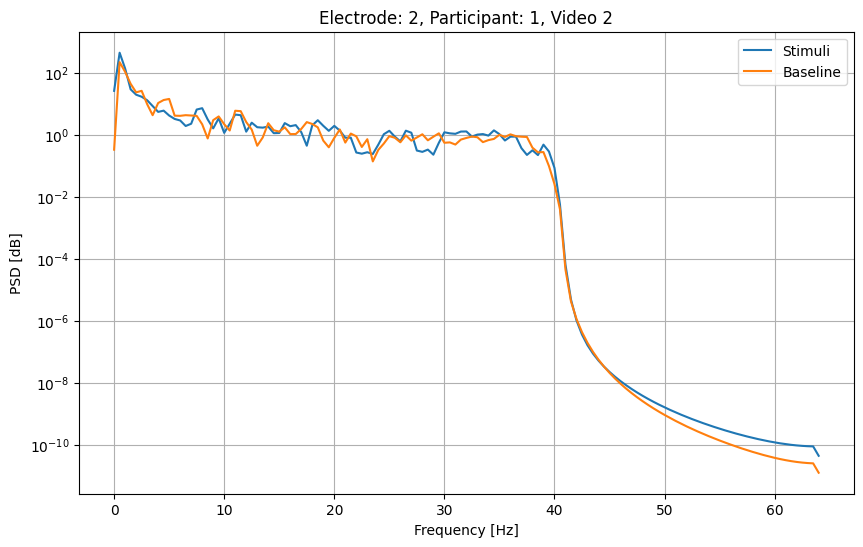

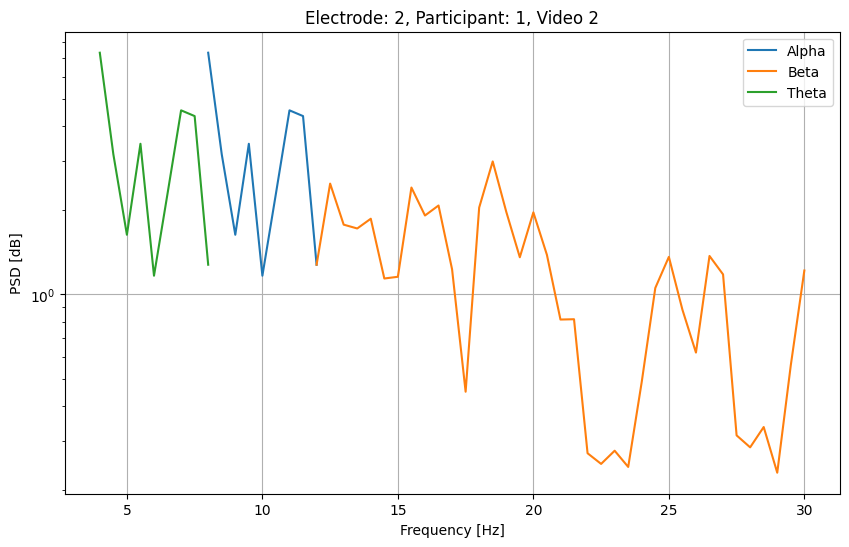

In [ ]:
plot_spectral_density(2,2,1)
plot_spectral_density_alpha_beta_theta(2,2,1)

Cette fonction a pour but d'extraire des caractéristiques à partir de signaux EEG brut. Les données brutes sont stockées dans une variable "raw" et les électrodes à partir desquelles les caractéristiques seront extraites sont stockées dans une variable "electrode".

La fonction commence par initialiser une matrice EEG_tmp de dimensions (23,18,36). Cette matrice sera utilisée pour stocker les caractéristiques extraites de chaque participant pour chaque vidéo.

La fonction parcourt ensuite les participants et les vidéos et extrait les signaux de base et de stimulation pour chaque participant et vidéo. Les signaux de base et de stimulation sont ensuite envoyés à la fonction preprocess_EEG qui calcule la densité spectrale de puissance (PSD) pour chaque électrode. Les PSD de la stimulation sont divisées par les PSD de base pour obtenir la densité relative. Les valeurs de densité relative sont stockées dans la matrice EEG_tmp.

La fonction se termine en créant un tableau de données pandas à partir de la matrice EEG_tmp, en redimensionnant le tableau de données pour avoir 36 colonnes et en normalisant les données à l'aide de la classe StandardScaler de scikit-learn. Enfin, la fonction renvoie le tableau de données pandas.

In [ ]:
def feat_extract_EEG(raw, electrode):
    EEG_tmp = np.zeros((23, 18, 36))
    for participant in range(0, 23):
        for video in range(0, 18):

              B, S = [], []
                
              basl = (raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["baseline"][0, 0][video, 0][:, electrode])
              stim = (raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["stimuli"][0, 0][video, 0][:, electrode])
                
              B = preprocess_EEG(basl, B) # baseline psd received
              S = preprocess_EEG(stim, S) # stimulation psd received

              A = np.divide(S, B)   # relative density(absolute is diff for each individual)
              column = 0

              for k in range(0,3):
                for l in range(0,12):
                  EEG_tmp[participant, video,column] = A[l][k]
                  column+=1
                                

    col = []

    for i in range(0, 12):
      col.append("psdtheta_"+str(i + 1)+"_un")
    for i in range(0, 12):
      col.append("psdalpha_"+str(i + 1)+"_un")
    for i in range(0, 12):
     col.append("psdbeta_"+str(i + 1)+"_un")

    print(EEG_tmp.shape)
    EEG_tmp = EEG_tmp.reshape(-1,EEG_tmp.shape[2])
    print(EEG_tmp.shape)
    data_EEG = pd.DataFrame(EEG_tmp, columns=col)
    scaler = StandardScaler()
    print(data_EEG)
    print(col)
    
    for i in range(len(col)):
        data_EEG[col[i][:-3]] = data_EEG[[col[i]]]
        
    data_EEG.drop(col, axis=1, inplace=True)
    return data_EEG

Cette fonction prend en entrée un objet 'raw' et crée un tableau 'a' de taille (23, 18, 9). Ensuite, elle parcourt les 23 participants et les 18 vidéos pour lesquels les données de valence, arousal et dominance doivent être prédites. Dans chaque itération de la boucle, la fonction remplit les premières colonnes de 'a' avec l'âge, le genre, le numéro de participant et le numéro de vidéo correspondants. La fonction remplit également les noms des vidéos et les émotions cibles pour chaque vidéo, ainsi que les scores de valence, d'excitation et de domination correspondants extraits de l'objet 'raw'.

Enfin, la fonction convertit 'a' en un objet DataFrame de pandas en réorganisant les données en 18*23 lignes et 9 colonnes correspondant à l'âge, le genre, le numéro de participant, le numéro de vidéo, le nom de la vidéo, l'émotion cible, la valence, l'excitation et la domination. La fonction retourne le DataFrame 'b'.

In [ ]:
def participant_affective(raw):
    a = np.zeros((23, 18, 9), dtype=object)
    for participant in range(0, 23):
        for video in range(0, 18):
            a[participant, video, 0] = (raw["DREAMER"][0, 0]["Data"]
                                        [0, participant]["Age"][0][0][0])
            
            a[participant, video, 1] = (raw["DREAMER"][0, 0]["Data"]
                                        [0, participant]["Gender"][0][0][0])
            
            a[participant, video, 2] = int(participant+1)
            
            a[participant, video, 3] = int(video+1)
            
            a[participant, video, 4] = ["Searching for Bobby Fischer",
                                        "D.O.A.", "The Hangover", "The Ring",
                                        "300", "National Lampoon\'s VanWilder",
                                        "Wall-E", "Crash", "My Girl",
                                        "The Fly", "Pride and Prejudice",
                                        "Modern Times", "Remember the Titans",
                                        "Gentlemans Agreement", "Psycho",
                                        "The Bourne Identitiy",
                                        "The Shawshank Redemption",
                                        "The Departed"][video]
            
            a[participant, video, 5] = ["calmness", "surprise", "amusement",
                                        "fear", "excitement", "disgust",
                                        "happiness", "anger", "sadness",
                                        "disgust", "calmness", "amusement",
                                        "happiness", "anger", "fear",
                                        "excitement", "sadness",
                                        "surprise"][video]
            a[participant, video, 6] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreValence"]
                                           [0, 0][video, 0])
            a[participant, video, 7] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreArousal"]
                                           [0, 0][video, 0])
            a[participant, video, 8] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreDominance"]
                                           [0, 0][video, 0])
    b = pd.DataFrame(a.reshape((23*18, a.shape[2])),
                     columns=["age", "gender", "participant",
                              "video", "video_name", "target_emotion",
                              "valence", "arousal", "dominance"])
    return b

Cette cellule doit être exécuté ligne par ligne pour sauvegarder chaque fois les caractéristiques(features) de l'électrode dans une variable séparée.

(23, 18, 36)
(414, 36)
     psdtheta_1_un  psdtheta_2_un  psdtheta_3_un  psdtheta_4_un  \
0         0.421335       0.885389       0.677391       0.948309   
1         1.288923       1.702448       0.934180       1.071815   
2         0.051714       1.058834       1.024259       0.949258   
3         1.685649       1.547942       1.331265       1.286291   
4         0.919277       1.176304       1.476342       1.197340   
..             ...            ...            ...            ...   
409       0.992601       2.210296       2.322192       0.841650   
410       1.947928       2.879985       1.550605       2.632891   
411       2.687541       4.006541       1.168938       0.853636   
412       0.105543       1.325369       1.445494       0.526817   
413       5.988962       1.477957       0.893531       3.242290   

     psdtheta_5_un  psdtheta_6_un  psdtheta_7_un  psdtheta_8_un  \
0         0.807581       0.857239       0.748488       0.686504   
1         0.928901       0.526587     

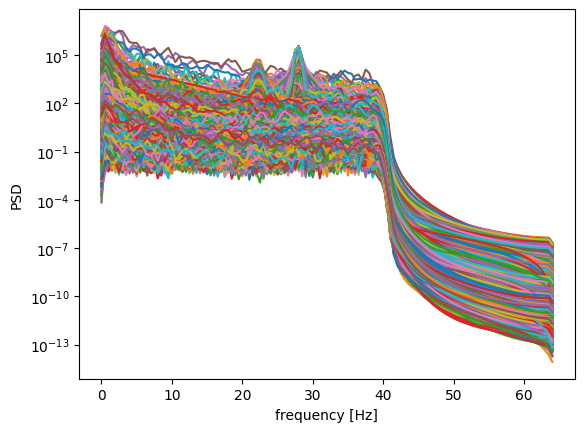

In [ ]:
#RUN Each one by one till cell where is it savd as csv

def_EEG1 = feat_extract_EEG(raw, 0)
#def_EEG2 = feat_extract_EEG(raw, 1)
#def_EEG3 = feat_extract_EEG(raw, 2)
#def_EEG4 = feat_extract_EEG(raw, 3)
#def_EEG5 = feat_extract_EEG(raw, 4)
#def_EEG6 = feat_extract_EEG(raw, 5)
#def_EEG7 = feat_extract_EEG(raw, 6)
#def_EEG8 = feat_extract_EEG(raw, 7)
#def_EEG9 = feat_extract_EEG(raw, 8)
#def_EEG10 = feat_extract_EEG(raw, 9)
#def_EEG11 = feat_extract_EEG(raw, 10)
#def_EEG12 = feat_extract_EEG(raw, 11)
#def_EEG13 = feat_extract_EEG(raw, 12)
#def_EEG14 = feat_extract_EEG(raw, 13)

Ce code concatène deux dataframes df_features et df_participant_affective en utilisant la fonction pd.concat(), pour créer le dataframe final df. Les colonnes valence, arousal et dominance de df_participant_affective sont converties en entiers en utilisant la méthode astype(int). Le dataframe final est stocké dans la variable df.

Le deuxième dataframe df2 est également créé en concaténant df_features et df_participant_affective avec la fonction pd.concat().

In [ ]:
#Choisir l'électrode voulu
df_features = def_EEG1

df_participant_affective = participant_affective(raw)

df_participant_affective["valence"] = (df_participant_affective
                                       ["valence"].astype(int))
df_participant_affective["arousal"] = (df_participant_affective
                                       ["arousal"].astype(int))
df_participant_affective["dominance"] = (df_participant_affective
                                         ["dominance"].astype(int))

df = pd.concat([df_features, df_participant_affective], axis=1)
df

psdtheta_1  psdtheta_2  psdtheta_3  psdtheta_4  psdtheta_5  psdtheta_6  \
0      0.421335    0.885389    0.677391    0.948309    0.807581    0.857239   
1      1.288923    1.702448    0.934180    1.071815    0.928901    0.526587   
2      0.051714    1.058834    1.024259    0.949258    1.132261    1.032313   
3      1.685649    1.547942    1.331265    1.286291    0.651538    0.773817   
4      0.919277    1.176304    1.476342    1.197340    1.104715    1.283958   
..          ...         ...         ...         ...         ...         ...   
409    0.992601    2.210296    2.322192    0.841650    0.823206    1.561487   
410    1.947928    2.879985    1.550605    2.632891    2.553637    1.365070   
411    2.687541    4.006541    1.168938    0.853636    0.576750    1.065370   
412    0.105543    1.325369    1.445494    0.526817    0.682025    0.357540   
413    5.988962    1.477957    0.893531    3.242290    1.858852    4.302135   

     psdtheta_7  psdtheta_8  psdtheta_9  psdtheta_10  ...  psdbeta_12  age  \
0      0.748488    0.686504    0.651159     1.028405  ...    1.043286   22   
1      0.702889    2.579461    1.268349     0.804324  ...    1.433327   22   
2      1.291512    0.970170    0.646293     0.598526  ...    0.480418   22   
3      1.101912    1.114889    0.973912     0.728934  ...    0.853458   22   
4      1.787334    1.620182    0.969316     0.825889  ...    0.615748   22   
..          ...         ...         ...          ...  ...         ...  ...   
409    1.079587    0.896511    4.182415     2.004529  ...    2.236062   25   
410    1.848515    0.872957    1.866602     1.285419  ...    1.149787   25   
411    0.861111    1.931698    1.004620     0.445338  ...    1.045917   25   
412    1.013858    1.000608    0.606809     2.488084  ...    0.877261   25   
413    5.157652    7.603530    6.510422     1.057099  ...    0.470404   25   

     gender  participant  video                   video_name  target_emotion  \
0      male            1      1  Searching for Bobby Fischer        calmness   
1      male            1      2                       D.O.A.        surprise   
2      male            1      3                 The Hangover       amusement   
3      male            1      4                     The Ring            fear   
4      male            1      5                          300      excitement   
..      ...          ...    ...                          ...             ...   
409    male           23     14         Gentlemans Agreement           anger   
410    male           23     15                       Psycho            fear   
411    male           23     16         The Bourne Identitiy      excitement   
412    male           23     17     The Shawshank Redemption         sadness   
413    male           23     18                 The Departed        surprise   

     valence  arousal  dominance  
0          4        3          2  
1          3        3          1  
2          5        4          4  
3          4        3          2  
4          4        4          4  
..       ...      ...        ...  
409        2        2          2  
410        2        2          2  
411        3        3          2  
412        2        2          4  
413        2        4          2  

[414 rows x 45 columns]

Ce code crée un nouveau DataFrame appelé data2 qui est une copie de df contenant uniquement les émotions cibles suivantes : 'anger', 'fear', 'calmness', 'surprise', 'excitement', 'amusement', 'happiness', 'sadness' et 'disgust'. Ensuite, il crée trois nouvelles colonnes dans data2 : 'class', 'valencehigh' et 'arousalhigh'. La colonne 'class' est créée en utilisant un dictionnaire qui associe chaque émotion à une classe numérique allant de 0 à 3. Les colonnes 'valencehigh' et 'arousalhigh' sont créées en utilisant des dictionnaires qui associent les valeurs de valence et d'excitation à des valeurs binaires de 0 ou 1. Enfin, le DataFrame data2 est enregistré en tant que fichier CSV sous le nom 'DE3_NS.csv'.

In [ ]:
data2 = df.loc[(df['target_emotion'] == 'anger') |
                (df['target_emotion'] == 'fear') |
                (df['target_emotion'] == 'calmness') |
                (df['target_emotion'] == 'surprise') |
                (df['target_emotion'] == 'excitement') |
                (df['target_emotion'] == 'amusement') |
                (df['target_emotion'] == 'happiness') |
                (df['target_emotion'] == 'sadness') |
                (df['target_emotion'] == 'disgust')].copy()

d={'surprise': 0, 'excitement': 0, 'amusement': 0, 'happiness': 0, 'fear': 1, 'anger': 1, 'sadness':2, 'disgust':2 ,'calmness': 3}
data2['class'] = data2.target_emotion.map(d)

e={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
data2['valencehigh'] = data2.valence.map(e)

f={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
data2['arousalhigh'] = data2.arousal.map(e)

data2.to_csv('DE3_NS.csv')

Ce code correspond à la sélection de données EEG brutes (non traitées) pour une paire participant-vidéo-électrode donnée à partir d'un ensemble de données stockées dans un dictionnaire multidimensionnel. Les données sont ensuite prétraitées (filtrage, normalisation) en utilisant une fonction nommée preprocess_EEG(). Les données de base (basl) et de stimulation (stim) sont stockées dans deux listes B et S. 

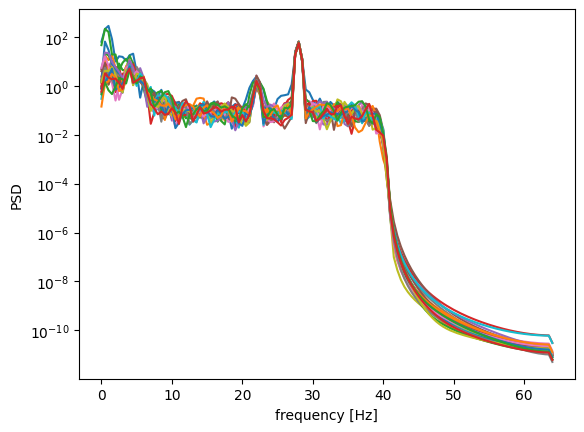

In [ ]:
participant =0
video = 0
electrode = 0
B, S = [], []
                
basl = (raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["baseline"][0, 0][video, 0][:, electrode])
stim = (raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["stimuli"][0, 0][video, 0][:, electrode])
                
B = preprocess_EEG(basl, B) 
S = preprocess_EEG(stim, S)

Cette fonction prend des données EEG brutes (non traitées) en entrée et extrait des caractéristiques (features) pertinentes de ces données. Elle organise ces caractéristiques dans un tableau et normalise les valeurs de ces caractéristiques pour qu'elles soient toutes comprises entre 0 et 1. La fonction renvoie ce tableau contenant les caractéristiques extraites normalisées.

In [ ]:
def feat_extract_EEG_All(raw):
    
    EEG_tmp = np.zeros((23, 18, 107520))
    for participant in range(0, 23):
        for video in range(0, 18):
          column=0
          for electrode in range(0,14):
            stim = (raw["DREAMER"][0, 0]["Data"][0, participant]["EEG"][0, 0]["stimuli"][0, 0][video, 0][:, electrode])
            for i in range(0,7680):
              EEG_tmp[participant,video,column]= stim[i]
              column+=1
                                

    col = []

    for i in range(0, 7680):
      col.append("Electrode1_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode2_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode3_"+str(i + 1))
    for i in range(0, 7680):
     col.append("Electrode4_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode5_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode6_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode7_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode8_"+str(i + 1))
    for i in range(0, 7680):
     col.append("Electrode9_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode10_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode11_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode12_"+str(i + 1))
    for i in range(0, 7680):
      col.append("Electrode13_"+str(i + 1))
    for i in range(0, 7680):
     col.append("Electrode14_"+str(i + 1))


    EEG_tmp = EEG_tmp.reshape(-1,EEG_tmp.shape[2])
    data_EEG = pd.DataFrame(EEG_tmp, columns=col)
    print(data_EEG)
    from sklearn import preprocessing

    x = data_EEG.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_EEG = pd.DataFrame(x_scaled)
    data_EEG.columns = col
    print(data_EEG)
    return data_EEG

Ce code commence par extraire les caractéristiques des signaux EEG bruts en utilisant la fonction "feat_extract_EEG_All". Ensuite, il crée des dataframes à partir des caractéristiques et des scores d'affect de chaque participant. Il convertit ensuite les scores de valence, d'excitation et de domination en entiers et concatène les deux dataframes.

Le code crée ensuite un nouveau dataframe "data1" en filtrant les émotions cibles à partir d'une colonne nommée "target_emotion". Il attribue un numéro de classe à chaque émotion cible et crée deux colonnes binaires "valencehigh" et "arousalhigh" à partir des scores de valence et d'excitation.

Enfin, il exporte le dataframe résultant dans un fichier CSV nommé "normalized.csv".

In [ ]:
def_all = feat_extract_EEG_All(raw)
df_features = def_all
df_participant_affective = participant_affective(raw)

df_participant_affective["valence"] = (df_participant_affective
                                       ["valence"].astype(int))
df_participant_affective["arousal"] = (df_participant_affective
                                       ["arousal"].astype(int))
df_participant_affective["dominance"] = (df_participant_affective
                                         ["dominance"].astype(int))
dfn = pd.concat([df_features, df_participant_affective], axis=1)
data1 = dfn.loc[(df['target_emotion'] == 'anger') |
                (df['target_emotion'] == 'fear') |
                (df['target_emotion'] == 'calmness') |
                (df['target_emotion'] == 'surprise') |
                (df['target_emotion'] == 'excitement') |
                (df['target_emotion'] == 'amusement') |
                (df['target_emotion'] == 'happiness') |
                (df['target_emotion'] == 'sadness') |
                (df['target_emotion'] == 'disgust')].copy()

d={'surprise': 0, 'excitement': 0, 'amusement': 0, 'happiness': 0, 'fear': 1, 'anger': 1, 'sadness':2, 'disgust':2 ,'calmness': 3}
data1['class'] = data1.target_emotion.map(d)

e={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
data1['valencehigh'] = data1.valence.map(e)

f={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
data1['arousalhigh'] = data1.arousal.map(e)

data1.to_csv('normalized.csv')

     Electrode1_1  Electrode1_2  Electrode1_3  Electrode1_4  Electrode1_5  \
0     4388.205128   4375.897436   4378.461538   4393.846154   4396.410256   
1     4397.435897   4396.410256   4380.000000   4378.461538   4390.769231   
2     4396.410256   4404.615385   4395.384615   4385.641026   4389.743590   
3     4410.769231   4400.000000   4389.743590   4392.307692   4405.641026   
4     4393.846154   4380.512821   4375.897436   4389.230769   4397.435897   
..            ...           ...           ...           ...           ...   
409   4459.487179   4462.051282   4474.871795   4480.512821   4477.948718   
410   4416.410256   4403.076923   4397.948718   4399.487179   4394.871795   
411   4352.307692   4338.461538   4316.923077   4308.717949   4308.717949   
412   4350.256410   4354.358974   4357.435897   4361.538462   4363.076923   
413   4476.923077   4497.435897   4518.974359   4524.102564   4532.820513   

     Electrode1_6  Electrode1_7  Electrode1_8  Electrode1_9  Electrode1_10 

In [ ]:
data1 = pd.read_csv("normalized.csv")  
data_1 = data1.head()
data_1 

Unnamed: 0  Electrode1_1  Electrode1_2  Electrode1_3  Electrode1_4  \
0           0      0.569037      0.585874      0.592858      0.609935   
1           1      0.570438      0.589092      0.593102      0.607435   
2           2      0.570283      0.590379      0.595542      0.608601   
3           3      0.572463      0.589655      0.594647      0.609685   
4           4      0.569893      0.586598      0.592451      0.609185   

   Electrode1_5  Electrode1_6  Electrode1_7  Electrode1_8  Electrode1_9  ...  \
0      0.649951      0.638583      0.640379      0.640466      0.649840  ...   
1      0.648975      0.640857      0.641872      0.638013      0.646469  ...   
2      0.648797      0.640770      0.643365      0.641342      0.648243  ...   
3      0.651549      0.643482      0.643892      0.640554      0.649752  ...   
4      0.650129      0.638845      0.639238      0.639239      0.649574  ...   

   participant  video                   video_name  target_emotion  valence  \
0            1      1  Searching for Bobby Fischer        calmness        4   
1            1      2                       D.O.A.        surprise        3   
2            1      3                 The Hangover       amusement        5   
3            1      4                     The Ring            fear        4   
4            1      5                          300      excitement        4   

   arousal  dominance  class  valencehigh  arousalhigh  
0        3          2      3            1            1  
1        3          1      0            1            1  
2        4          4      0            1            1  
3        3          2      1            1            1  
4        4          4      0            1            1  

[5 rows x 107533 columns]

Dans ce code, on commence par extraire deux colonnes du DataFrame data2 qui sont nommées psdalpha_12 et psdalpha_3. Les valeurs de ces deux colonnes sont ensuite converties en tableaux numpy de type float. Ensuite, ces deux tableaux sont concaténés en un seul tableau numpy df3.

Ensuite, on réinitialise l'index de data2, puis on extrait toutes les colonnes à partir de la 2ème colonne jusqu'à la 36ème colonne à l'aide de la méthode iloc. Les colonnes extraites sont stockées dans le DataFrame dfz.

In [ ]:

df1=data2.reset_index()['psdalpha_12']
df2=data2.reset_index()['psdalpha_3']
df1 = np.array(df1, dtype = float)
df2 = np.array(df2, dtype = float)
df3 = np.concatenate((df1, df2), axis=0)
data2=data2.reset_index()
dfz=data2.iloc[:,1:37]


In [ ]:
dfz
dfy=pd.DataFrame(data={ 'alpha12':df1,'alpha3':df2})
dfz = np.array(dfz, dtype = float)
dfz

array([[0.42133485, 0.88538934, 0.6773909 , ..., 1.04637666, 1.07440876,
        1.04328633],
       [1.28892284, 1.70244807, 0.9341802 , ..., 1.10292823, 1.00274691,
        1.43332663],
       [0.0517138 , 1.0588335 , 1.02425864, ..., 0.80609659, 0.79515479,
        0.4804178 ],
       ...,
       [2.68754101, 4.00654138, 1.1689378 , ..., 0.63848691, 1.00559558,
        1.04591681],
       [0.1055427 , 1.3253693 , 1.44549396, ..., 1.41145131, 0.79990459,
        0.87726125],
       [5.98896165, 1.47795697, 0.89353092, ..., 1.29024098, 0.86678892,
        0.4704045 ]])

In [ ]:
target=data2['valencehigh']
target

0      1
1      1
2      1
3      1
4      1
      ..
409    0
410    0
411    1
412    0
413    0
Name: valencehigh, Length: 414, dtype: int64

La première ligne importe la fonction train_test_split du module model_selection de la bibliothèque sklearn (Scikit-Learn), qui permet de diviser les données en ensemble d'entraînement et ensemble de test pour l'évaluation d'un modèle de machine learning.

Les trois lignes suivantes créent des tableaux numpy contenant les données d'entrée (features) de l'ensemble d'entraînement et de test (df1, df2) ainsi que la variable cible (target). La méthode dtype = float est utilisée pour s'assurer que les données sont stockées sous forme de nombres flottants.

Enfin, la dernière ligne applique la fonction train_test_split pour diviser les données en deux ensembles, un pour l'entraînement (x_Train et y_Train) et l'autre pour le test (x_Test et y_Test), avec une proportion de 35% pour l'ensemble de test et une graine aléatoire de 6 pour la reproductibilité.

In [ ]:
from sklearn.model_selection import train_test_split
df1 = np.array(df1, dtype = float)
df2 = np.array(df2, dtype = float)
target = np.array(target, dtype = float)


x_Train, x_Test, y_Train, y_Test = train_test_split(dfz, target, test_size = 0.35, random_state = 6)

In [ ]:
y_Train

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

Ces trois lignes de code préparent les données pour l'entrainement d'un modèle de réseau de neurones en redimensionnant les données d'entraînement et de test pour qu'elles aient la forme (n_samples, n_channels, n_features). Ici, il y a 1 canal car il n'y a qu'un seul type de données (PSD) utilisé, et 36 caractéristiques par canal (caractéristiques extraites du PSD). La fonction reshape de numpy est utilisée pour redimensionner les tableaux en conséquence.

In [ ]:
x_Train = x_Train.reshape(x_Train.shape[0],1,36)
x_Test = x_Test.reshape(x_Test.shape[0],1,36)
x_Test.shape

(145, 1, 36)

Ce code crée un modèle de réseau de neurones pour la classification binaire à partir des données d'entraînement et de test préparées précédemment. Le modèle est créé en utilisant les couches d'entrée, de LSTM et de sortie de Keras, et utilise une fonction d'activation relu pour la couche LSTM et une fonction d'activation sigmoid pour la couche de sortie. L'optimiseur Adamax est utilisé pour minimiser la perte binaire_crossentropy et maximiser la précision du modèle. Le modèle est entraîné sur 1000 epochs avec une taille de lot de 20 et un poids de classe spécifique est donné pour la classification des classes minoritaires. Les résultats de la formation sont stockés dans l'objet d'historique.

In [ ]:
import tensorflow.keras.layers as KL
inputs = KL.Input(shape=(1,36))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = tf.keras.models.Model(inputs, outputs)

opt = tf.keras.optimizers.Adamax()
model.compile( optimizer=opt , loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_Train, y_Train, batch_size=20, epochs=1000, class_weight={0:1, 1:2},validation_data =(x_Test,y_Test))



Epoch 1/1000
14/14 [==============================] - 2s 26ms/step - loss: 1.5174 - accuracy: 0.5874 - val_loss: 23.8123 - val_accuracy: 0.5793
Epoch 2/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.4262 - accuracy: 0.6394 - val_loss: 23.1250 - val_accuracy: 0.5724
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 1.3697 - accuracy: 0.6320 - val_loss: 22.5860 - val_accuracy: 0.5724
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 1.3272 - accuracy: 0.6245 - val_loss: 22.1776 - val_accuracy: 0.5655
Epoch 5/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.2983 - accuracy: 0.6357 - val_loss: 21.8703 - val_accuracy: 0.5655
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 1.2796 - accuracy: 0.6394 - val_loss: 21.5923 - val_accuracy: 0.5586
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 1.2641 - accuracy: 0.6394 - val_loss: 21.4125 - val_accuracy: 0.551

In [ ]:
y_pred = model.predict(x_Test)
print(y_pred)

5/5 [==============================] - 0s 3ms/step
[[1.82088919e-03]
 [9.01153922e-01]
 [9.97138500e-01]
 [9.60735261e-01]
 [6.09667957e-01]
 [6.51118517e-01]
 [9.99879122e-01]
 [3.56867164e-01]
 [9.30136144e-01]
 [1.41099557e-01]
 [6.74915969e-01]
 [9.77024257e-01]
 [9.58272576e-01]
 [8.86232495e-01]
 [9.60211158e-01]
 [6.79102838e-01]
 [1.71188102e-03]
 [8.57659876e-01]
 [6.51017942e-08]
 [6.39820218e-01]
 [9.10412550e-01]
 [9.37955558e-01]
 [4.34512466e-01]
 [9.62305605e-01]
 [9.65954781e-01]
 [8.95452261e-01]
 [9.86748099e-01]
 [2.31862716e-14]
 [8.28164756e-01]
 [8.90465915e-01]
 [6.90435827e-01]
 [5.42548671e-02]
 [7.69896805e-01]
 [9.81174231e-01]
 [8.86174500e-01]
 [7.44216025e-01]
 [0.00000000e+00]
 [1.36745202e-05]
 [8.20894599e-01]
 [9.69298065e-01]
 [9.43197668e-01]
 [9.71272230e-01]
 [8.61741722e-01]
 [1.00000000e+00]
 [3.14078748e-01]
 [1.08936086e-01]
 [9.40778673e-01]
 [1.00000000e+00]
 [4.94752347e-01]
 [9.66509700e-01]
 [5.60340166e-01]
 [9.78955150e-01]
 [9.99790192e

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 36)]           0         
                                                                 
 lstm_10 (LSTM)              (None, 8)                 1440      
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,449
Trainable params: 1,449
Non-trainable params: 0
_________________________________________________________________


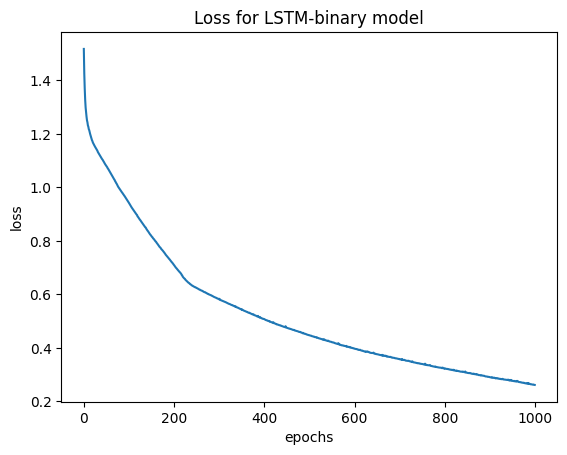

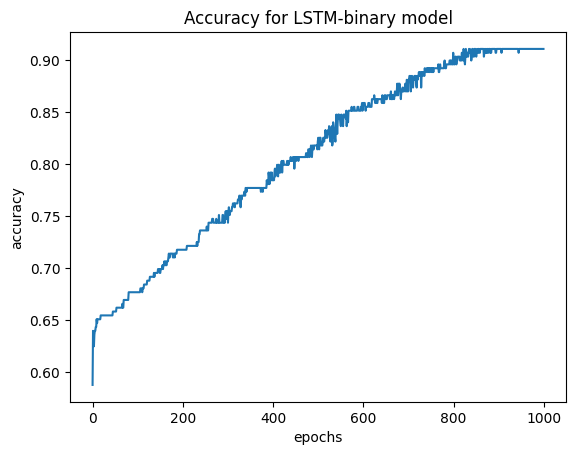

In [ ]:
 plt.plot(history.history['loss'])
 plt.title('Loss for LSTM-binary model')
 plt.xlabel('epochs')
 plt.ylabel('loss')
 plt.show()
 plt.plot(history.history['accuracy'])
 plt.title('Accuracy for LSTM-binary model')
 plt.xlabel('epochs')
 plt.ylabel('accuracy')
 plt.show()

Ce code construit un modèle de réseau de neurones à longue mémoire récurrent (LSTM) pour prédire la valence émotionnelle. Les données d'entraînement et de test sont préparées en transformant les tableaux 2D en tableaux 3D avec une dimension supplémentaire pour le temps. Le modèle est construit en utilisant la classe Sequential de Keras, qui permet de définir une pile linéaire de couches de neurones. Le modèle contient deux couches LSTM avec des unités de 128 et 64, respectivement. Des couches Dropout sont également ajoutées pour éviter le surapprentissage. Enfin, deux couches de neurones Denses avec des fonctions d'activation ReLU et Sigmoid sont ajoutées pour produire les prédictions. Le modèle est compilé avec l'optimiseur Adam, la fonction de perte 'sparse_categorical_crossentropy' et la métrique 'accuracy'. Le modèle est ensuite entraîné avec les données d'entraînement et les prédictions sont générées à partir des données de test.

In [ ]:
x_Train = x_Train.reshape(x_Train.shape[0],1,36)
x_Test = x_Test.reshape(x_Test.shape[0],1,36)

model = Sequential()
model.add(LSTM(128,activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation ='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation ='relu'))
model.add(Dense(2,activation ='sigmoid'))
y_pred = model.predict(x_Test)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer =opt,metrics=['accuracy'])
history = model.fit(x_Train,y_Train,batch_size=16,epochs=200, validation_data =(x_Test,y_Test))

5/5 [==============================] - 1s 4ms/step
Epoch 1/200
17/17 [==============================] - 4s 32ms/step - loss: 0.6916 - accuracy: 0.5725 - val_loss: 0.6898 - val_accuracy: 0.5586
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.6431 - val_loss: 0.7006 - val_accuracy: 0.5586
Epoch 3/200
17/17 [==============================] - 0s 8ms/step - loss: 0.6380 - accuracy: 0.6468 - val_loss: 0.7135 - val_accuracy: 0.5517
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 0.6334 - accuracy: 0.6506 - val_loss: 0.7285 - val_accuracy: 0.5448
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 0.6238 - accuracy: 0.6654 - val_loss: 0.7493 - val_accuracy: 0.5448
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.6209 - accuracy: 0.6580 - val_loss: 0.7993 - val_accuracy: 0.5586
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.6089 - accuracy: 0.6729 - v

In [ ]:
print(y_pred)

[[0.509931   0.49163437]
 [0.502331   0.49639684]
 [0.50482875 0.4988278 ]
 [0.5002015  0.49775144]
 [0.5009358  0.49628708]
 [0.502174   0.49631107]
 [0.5092673  0.49380705]
 [0.50209826 0.49684832]
 [0.5020466  0.49786833]
 [0.50027335 0.49227333]
 [0.50063413 0.49741197]
 [0.48994476 0.45454758]
 [0.50199586 0.47404525]
 [0.50116074 0.49682644]
 [0.50631696 0.49821934]
 [0.5002691  0.4956053 ]
 [0.4936979  0.48906624]
 [0.49784195 0.49548063]
 [0.5100329  0.47693834]
 [0.5025862  0.4989536 ]
 [0.5016827  0.49812502]
 [0.49818277 0.47756302]
 [0.503819   0.4924988 ]
 [0.49628827 0.49003696]
 [0.50386465 0.49724653]
 [0.4990224  0.4970505 ]
 [0.49831206 0.4915661 ]
 [0.53151894 0.49367315]
 [0.5034178  0.49656895]
 [0.4999247  0.49669677]
 [0.49965915 0.49631327]
 [0.48313904 0.46657273]
 [0.5011237  0.49574494]
 [0.49995166 0.49743637]
 [0.5016485  0.49445018]
 [0.49829617 0.49587652]
 [0.9987507  0.        ]
 [0.50861794 0.49924004]
 [0.5014818  0.4976551 ]
 [0.50094134 0.49604353]


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 1, 128)            84480     
                                                                 
 dropout_12 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 2)                 66        
                                                                 
Total params: 136,034
Trainable params: 136,034
Non-tr

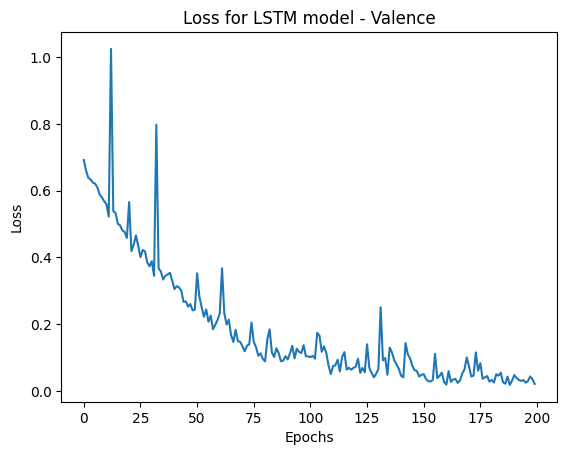

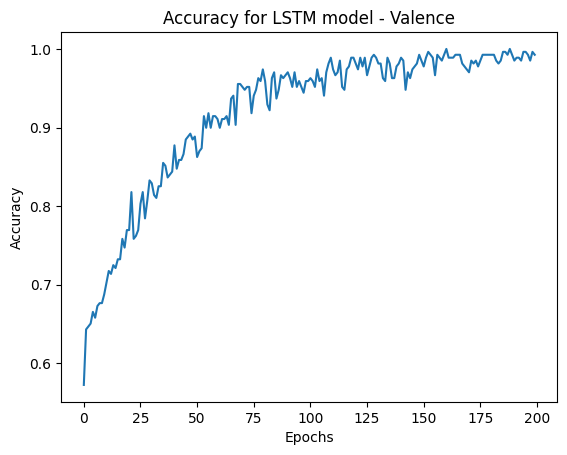

In [ ]:
 plt.plot(history.history['loss'])
 plt.title("Loss for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history.history['accuracy'])
 plt.title("Accuracy for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()


Le deuxième modèle est un modèle CNN (Convolutional Neural Network). Le modèle a deux couches Dense avec une fonction d'activation ReLU, une couche Flatten qui convertit les données en un vecteur, et une couche Dense avec une fonction d'activation softmax qui produit la sortie en 10 catégories. Le modèle utilise également une fonction de perte "sparse_categorical_crossentropy" et l'optimiseur Adam pour la classification en deux catégories. Le modèle est entraîné sur les mêmes données d'apprentissage que le premier modèle, mais pendant 200 époques.

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(128,activation =tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128,activation =tf.nn.relu))
model.add(Dense(9,activation =tf.nn.softmax))


opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer =opt ,metrics=['accuracy'])
history_CNN = model.fit(x_Train,y_Train,epochs=200, validation_data =(x_Test,y_Test))

Epoch 1/200
9/9 [==============================] - 2s 44ms/step - loss: 2.4884 - accuracy: 0.4015 - val_loss: 1.5883 - val_accuracy: 0.5586
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 1.0450 - accuracy: 0.6245 - val_loss: 1.1923 - val_accuracy: 0.5172
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7335 - accuracy: 0.6022 - val_loss: 1.2020 - val_accuracy: 0.5517
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6498 - accuracy: 0.6729 - val_loss: 1.2237 - val_accuracy: 0.5517
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.6580 - val_loss: 1.3021 - val_accuracy: 0.5517
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6135 - accuracy: 0.6580 - val_loss: 1.3704 - val_accuracy: 0.5310
Epoch 7/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6120 - accuracy: 0.6803 - val_loss: 1.3270 - val_accuracy: 0.5103
Epoch 8/200
9/9 [=====

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 36)                0         
                                                                 
 dense_19 (Dense)            (None, 128)               4736      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 22,409
Trainable params: 22,409
Non-trainable params: 0
_________________________________________________________________


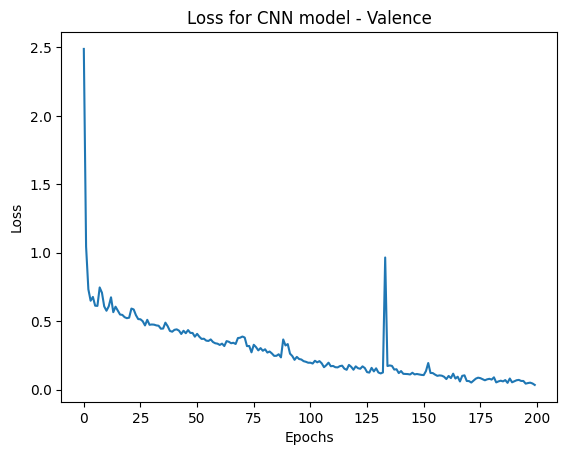

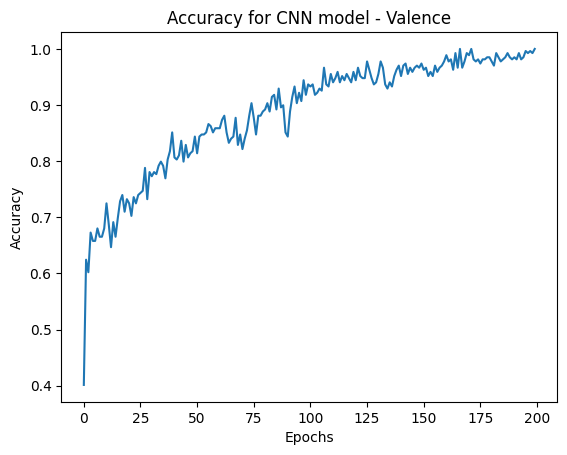

In [ ]:
 plt.plot(history_CNN.history['loss'])
 plt.title("Loss for CNN model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history_CNN.history['accuracy'])
 plt.title("Accuracy for CNN model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()


Dans ce code, les données sont préparées pour la prédiction de l'AROUSAL. Les valeurs de psdalpha_1 et psdbeta_1 sont extraites et divisées entre elles, puis les valeurs de psdalpha_12 et psdbeta_12 sont également extraites et divisées. Les deux nouveaux ensembles de données sont ensuite concaténés pour former df8.

In [ ]:
#DATA PREP FOR AROUSAL
df4=data2.reset_index()['psdalpha_1']
df5=data2.reset_index()['psdbeta_1']

df45 = df5/df4

df6=data2.reset_index()['psdalpha_12']
df7=data2.reset_index()['psdbeta_12']

df67  = df6/df7

df8 = df45.append(df67)
df8

<ipython-input-115-c4ccac6e9d6b>:12: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



0      0.928405
1      1.431437
2      0.936588
3      0.817585
4      0.478124
         ...   
409    0.305941
410    0.463486
411    0.847588
412    0.637484
413    0.969738
Length: 828, dtype: float64

In [ ]:
target2 =data2['arousalhigh']
target2

0      1
1      1
2      1
3      1
4      1
      ..
409    0
410    0
411    1
412    0
413    1
Name: arousalhigh, Length: 414, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
target2 = np.array(target2, dtype = float)
x_Train2, x_Test2, y_Train2, y_Test2 = train_test_split(dfz, target2, test_size = 0.35, random_state = 5)

In [ ]:
x_Train2 = x_Train2.reshape(x_Train2.shape[0],1,36)
x_Test2 = x_Test2.reshape(x_Test2.shape[0],1,36)
x_Test2.shape

(145, 1, 36)

Ce code crée un modèle de réseaux de neurones LSTM pour la classification de l'arousal. Il utilise la fonction d'activation 'relu' pour les couches LSTM et une fonction d'activation 'softmax' pour la couche de sortie Dense. Le modèle est compilé avec l'optimiseur Adam et une fonction de perte de 'sparse_categorical_crossentropy'. Il est ensuite entraîné sur les données d'entraînement et évalué sur les données de validation pour 1000 époques.

In [ ]:
model = Sequential()
model.add(LSTM(128,activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation ='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer =opt,metrics=['accuracy'])
history = model.fit(x_Train2,y_Train2,epochs=1000, validation_data =(x_Test2,y_Test2))

Epoch 1/1000
9/9 [==============================] - 3s 65ms/step - loss: 2.2580 - accuracy: 0.4498 - val_loss: 2.2599 - val_accuracy: 0.7379
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.9378 - accuracy: 0.7138 - val_loss: 1.8951 - val_accuracy: 0.7448
Epoch 3/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.2306 - accuracy: 0.7100 - val_loss: 1.9217 - val_accuracy: 0.7517
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.7673 - accuracy: 0.7100 - val_loss: 1.0170 - val_accuracy: 0.7172
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.6739 - accuracy: 0.6803 - val_loss: 1.4806 - val_accuracy: 0.7517
Epoch 6/1000
9/9 [==============================] - 0s 13ms/step - loss: 2.0146 - accuracy: 0.7100 - val_loss: 1.6709 - val_accuracy: 0.7517
Epoch 7/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.6235 - accuracy: 0.7138 - val_loss: 1.4543 - val_accuracy: 0.7517
Epoch 8/1000


In [ ]:
 plt.plot(history.history['loss'])
 plt.title("Loss for LSTM model - Arousal")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history.history['accuracy'])
 plt.title("Accuracy for LSTM model - Arousal")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()


#ECG SIGNALS

La fonction "participant_affective(raw)" prend en entrée un objet "raw". Elle crée une matrice "a" de dimensions (23,18,9) remplit de zéros et de type objet. Cette matrice sera remplie de données issues de l'objet "raw" pour chaque participant et chaque vidéo. Elle crée ensuite un DataFrame "b" de dimensions (23*18, 9) avec les données de la matrice "a" et des noms de colonnes spécifiques. Enfin, elle renvoie le DataFrame "b".

In [4]:
def participant_affective(raw):
    a = np.zeros((23, 18, 9), dtype=object)
    for participant in range(0, 23):
        for video in range(0, 18):
            a[participant, video, 0] = (raw["DREAMER"][0, 0]["Data"]
                                        [0, participant]["Age"][0][0][0])
            
            a[participant, video, 1] = (raw["DREAMER"][0, 0]["Data"]
                                        [0, participant]["Gender"][0][0][0])
            
            a[participant, video, 2] = int(participant+1)
            
            a[participant, video, 3] = int(video+1)
            
            a[participant, video, 4] = ["Searching for Bobby Fischer",
                                        "D.O.A.", "The Hangover", "The Ring",
                                        "300", "National Lampoon\'s VanWilder",
                                        "Wall-E", "Crash", "My Girl",
                                        "The Fly", "Pride and Prejudice",
                                        "Modern Times", "Remember the Titans",
                                        "Gentlemans Agreement", "Psycho",
                                        "The Bourne Identitiy",
                                        "The Shawshank Redemption",
                                        "The Departed"][video]
            
            a[participant, video, 5] = ["calmness", "surprise", "amusement",
                                        "fear", "excitement", "disgust",
                                        "happiness", "anger", "sadness",
                                        "disgust", "calmness", "amusement",
                                        "happiness", "anger", "fear",
                                        "excitement", "sadness",
                                        "surprise"][video]
            a[participant, video, 6] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreValence"]
                                           [0, 0][video, 0])
            a[participant, video, 7] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreArousal"]
                                           [0, 0][video, 0])
            a[participant, video, 8] = int(raw["DREAMER"][0, 0]["Data"]
                                           [0, participant]["ScoreDominance"]
                                           [0, 0][video, 0])
    b = pd.DataFrame(a.reshape((23*18, a.shape[2])),
                     columns=["age", "gender", "participant",
                              "video", "video_name", "target_emotion",
                              "valence", "arousal", "dominance"])
    return b

Cette fonction extrait les données d'ECG (électrocardiogramme) pour les stimuli et les périodes de base des 23 participants de l'étude DREAMER. Les signaux ECG pour chaque participant et vidéo sont stockés dans des matrices ECG_tmp_stim et ECG_tmp_basl. Les signaux ECG pour chaque participant et vidéo sont stockés dans des matrices ECG_tmp_stim et ECG_tmp_basl. Ensuite, ces données sont normalisées à l'aide de la méthode MinMaxScaler du module preprocessing de sklearn et stockées dans les dataframes data_ECG_stim et data_ECG_basl respectivement. Ces dataframes sont ensuite renvoyés par la fonction.

In [5]:
def feat_extract_ECG_scaled(raw):
    
    ECG_tmp_stim = np.zeros((23, 18, 31232))
    ECG_tmp_basl = np.zeros((23, 18, 31232))
    for participant in range(0, 23):
        for video in range(0, 18):
          column=0
          for signal in range(0,2):
            stim = (raw["DREAMER"][0, 0]["Data"][0, participant]["ECG"][0, 0]["stimuli"][0, 0][video, 0][:, signal])
            basl = (raw["DREAMER"][0, 0]["Data"][0, participant]["ECG"][0, 0]["baseline"][0, 0][video, 0][:, signal])
            for i in range(0,15616):
              ECG_tmp_stim[participant,video,column]= stim[i]
              ECG_tmp_basl[participant,video,column]= basl[i]
              column+=1
                                

    col_stim = []
    col_basl = []

    for i in range(0, 15616):
      col_stim.append("RA"+str(i + 1))
    for i in range(0, 15616):
      col_stim.append("LA"+str(i + 1))
    for i in range(0, 15616):
      col_basl.append("RA"+str(i + 1))
    for i in range(0, 15616):
      col_basl.append("LA"+str(i + 1))



    ECG_tmp_stim = ECG_tmp_stim.reshape(-1,ECG_tmp_stim.shape[2])
    data_ECG_stim = pd.DataFrame(ECG_tmp_stim, columns=col_stim)

    ECG_tmp_basl = ECG_tmp_basl.reshape(-1,ECG_tmp_basl.shape[2])
    data_ECG_basl = pd.DataFrame(ECG_tmp_basl, columns=col_basl)

    from sklearn import preprocessing

    x_stim = data_ECG_stim.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled_stim = min_max_scaler.fit_transform(x_stim)
    data_ECG_stim = pd.DataFrame(x_scaled_stim)
    data_ECG_stim.columns = col_stim

    x_basl = data_ECG_basl.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled_basl = min_max_scaler.fit_transform(x_basl)
    data_ECG_basl = pd.DataFrame(x_scaled_basl)
    data_ECG_basl.columns = col_basl
    return data_ECG_stim,data_ECG_basl

In [6]:
ecg_stim_data,ecg_basl_data = feat_extract_ECG_scaled(raw)

In [ ]:
ecg_stim_data

RA1       RA2       RA3       RA4       RA5       RA6       RA7  \
0    0.471789  0.303815  0.318508  0.305866  0.284197  0.312684  0.329323   
1    0.481393  0.295640  0.314204  0.300279  0.274900  0.309735  0.324812   
2    0.438175  0.276567  0.298422  0.289106  0.264276  0.305310  0.321805   
3    0.482593  0.317439  0.338594  0.326816  0.306773  0.348083  0.356391   
4    0.512605  0.298365  0.324247  0.312849  0.289509  0.324484  0.335338   
..        ...       ...       ...       ...       ...       ...       ...   
409  0.879952  0.351499  0.368723  0.337989  0.304117  0.327434  0.326316   
410  0.519808  0.343324  0.352941  0.335196  0.298805  0.345133  0.353383   
411  0.468187  0.257493  0.279770  0.273743  0.249668  0.284661  0.285714   
412  0.507803  0.410082  0.449067  0.438547  0.418327  0.474926  0.493233   
413  0.529412  0.314714  0.324247  0.340782  0.330677  0.398230  0.421053   

          RA8       RA9      RA10  ...   LA15607   LA15608   LA15609  \
0    0.360791  0.373737  0.328788  ...  0.269702  0.234375  0.212121   
1    0.359143  0.356902  0.316667  ...  0.301226  0.273438  0.245791   
2    0.352554  0.368687  0.328788  ...  0.338004  0.296875  0.274411   
3    0.390445  0.402357  0.359091  ...  0.294221  0.256250  0.230640   
4    0.370675  0.382155  0.342424  ...  0.227671  0.229687  0.228956   
..        ...       ...       ...  ...       ...       ...       ...   
409  0.354201  0.367003  0.321212  ...  0.297723  0.264062  0.232323   
410  0.385502  0.383838  0.340909  ...  0.364273  0.320312  0.286195   
411  0.319605  0.336700  0.300000  ...  0.360771  0.329687  0.296296   
412  0.555189  0.577441  0.527273  ...  0.295972  0.260937  0.235690   
413  0.472817  0.481481  0.427273  ...  0.281961  0.237500  0.213805   

      LA15610   LA15611   LA15612   LA15613   LA15614   LA15615   LA15616  
0    0.157895  0.179959  0.166307  0.115234  0.137184  0.157495  0.186879  
1    0.208711  0.231084  0.220302  0.166016  0.191336  0.208729  0.234592  
2    0.241379  0.263804  0.261339  0.201172  0.216606  0.242884  0.276342  
3    0.188748  0.210634  0.198704  0.140625  0.162455  0.184061  0.212724  
4    0.194192  0.216769  0.205184  0.156250  0.169675  0.201139  0.234592  
..        ...       ...       ...       ...       ...       ...       ...  
409  0.194192  0.202454  0.192225  0.144531  0.166065  0.184061  0.212724  
410  0.254083  0.271984  0.246220  0.187500  0.194946  0.214421  0.248509  
411  0.263158  0.280164  0.263499  0.201172  0.198556  0.222011  0.254473  
412  0.199637  0.214724  0.205184  0.146484  0.166065  0.193548  0.222664  
413  0.176044  0.196319  0.170626  0.123047  0.148014  0.170778  0.208748  

[414 rows x 31232 columns]

Cette fonction extrait les données d'ECG (électrocardiogramme) pour les stimuli et les périodes de base des 23 participants de l'étude DREAMER. Les signaux ECG pour chaque participant et vidéo sont stockés dans des matrices ECG_tmp_stim et ECG_tmp_basl. Les signaux ECG pour chaque participant et vidéo sont stockés dans des matrices ECG_tmp_stim et ECG_tmp_basl. Ces dataframes sont ensuite renvoyés par la fonction.

In [ ]:
def feat_extract_ECG(raw):
    
    ECG_tmp_stim = np.zeros((23, 18, 31232))
    ECG_tmp_basl = np.zeros((23, 18, 31232))
    for participant in range(0, 23):
        for video in range(0, 18):
          column=0
          for signal in range(0,2):
            stim = (raw["DREAMER"][0, 0]["Data"][0, participant]["ECG"][0, 0]["stimuli"][0, 0][video, 0][:, signal])
            basl = (raw["DREAMER"][0, 0]["Data"][0, participant]["ECG"][0, 0]["baseline"][0, 0][video, 0][:, signal])
            for i in range(0,15616):
              ECG_tmp_stim[participant,video,column]= stim[i]
              ECG_tmp_basl[participant,video,column]= basl[i]
              column+=1
                                

    col_stim = []
    col_basl = []

    for i in range(0, 15616):
      col_stim.append("RA"+str(i + 1))
    for i in range(0, 15616):
      col_stim.append("LA"+str(i + 1))
    for i in range(0, 15616):
      col_basl.append("RA"+str(i + 1))
    for i in range(0, 15616):
      col_basl.append("LA"+str(i + 1))



    ECG_tmp_stim = ECG_tmp_stim.reshape(-1,ECG_tmp_stim.shape[2])
    data_ECG_stim = pd.DataFrame(ECG_tmp_stim, columns=col_stim)

    ECG_tmp_basl = ECG_tmp_basl.reshape(-1,ECG_tmp_basl.shape[2])
    data_ECG_basl = pd.DataFrame(ECG_tmp_basl, columns=col_basl)

    return data_ECG_stim,data_ECG_basl

Ce code utilise la bibliothèque Plotly pour tracer un graphique de signaux ECG pour un participant donné. Les signaux d'ECG sont extraits des données de stimulus et de ligne de base pour les deux canaux RA et LA . Les signaux sont tracés en fonction du temps avec une couleur différente pour chaque signal. Le code définit également un titre pour le graphique ainsi que des étiquettes pour les axes x et y. Le graphique est créé en utilisant les données tracées et la mise en page définie, puis est affiché à l'aide de la fonction "fig.show()".

In [ ]:
import plotly.graph_objs as go
import scipy.signal as signal

df_subset_stim_RA = ecg_stim_data.iloc[2,:15616]
df_subset_stim_LA = ecg_stim_data.iloc[2,15617:]
df_subset_basl_RA = ecg_basl_data.iloc[2, :15616]
df_subset_basl_LA = ecg_basl_data.iloc[2, 15617:]

trace1 = go.Scatter(x=df_subset_stim_RA.index, y=df_subset_stim_RA.values, mode='lines', name='Stimulus RA', line=dict(color='blue'))
trace2 = go.Scatter(x=df_subset_stim_LA.index, y=df_subset_stim_LA.values, mode='lines', name='Stimulus LA', line=dict(color='green'))
trace3 = go.Scatter(x=df_subset_basl_RA.index, y=df_subset_basl_RA.values, mode='lines', name='Baseline RA', line=dict(color='red'))
trace4 = go.Scatter(x=df_subset_basl_LA.index, y=df_subset_basl_LA.values, mode='lines', name='Baseline LA', line=dict(color='purple'))

peaks_stim_RA, _ = signal.find_peaks(df_subset_stim_RA.values, distance=150)
trace_peaks_stim_RA = go.Scatter(x=df_subset_stim_RA.index[peaks_stim_RA], y=df_subset_stim_RA.values[peaks_stim_RA], mode='markers', 
                         name='Pics Stim RA', marker=dict(color='pink', symbol='triangle-down', size=7, line=dict(width=1, color='pink')))

peaks_stim_LA, _ = signal.find_peaks(df_subset_stim_LA.values, distance=150)
trace_peaks_stim_LA = go.Scatter(x=df_subset_stim_LA.index[peaks_stim_LA], y=df_subset_stim_LA.values[peaks_stim_LA], mode='markers', 
                         name='Pics Stim LA', marker=dict(color='orange', symbol='triangle-down', size=7, line=dict(width=1, color='orange')))

peaks_basl_RA, _ = signal.find_peaks(df_subset_basl_RA.values, distance=150)
trace_peaks_basl_RA = go.Scatter(x=df_subset_basl_RA.index[peaks_basl_RA], y=df_subset_basl_RA.values[peaks_basl_RA], mode='markers', 
                         name='Pics Basl RA', marker=dict(color='green', symbol='triangle-down', size=7, line=dict(width=1, color='green')))

peaks_basl_LA, _ = signal.find_peaks(df_subset_basl_LA.values, distance=150)
trace_peaks_basl_LA = go.Scatter(x=df_subset_basl_LA.index[peaks_basl_LA], y=df_subset_basl_LA.values[peaks_basl_LA], mode='markers', 
                         name='Pics Basl LA', marker=dict(color='purple', symbol='triangle-down', size=7, line=dict(width=1, color='purple')))

layout = go.Layout(title='Figure des signaux ECG', xaxis=dict(title='temps'), yaxis=dict(title='Signal'))

fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace_peaks_stim_RA, trace_peaks_stim_LA, trace_peaks_basl_RA, trace_peaks_basl_LA], layout=layout)

fig.show()


In [7]:
import plotly.graph_objs as go
import scipy.signal as signal

df_subset_stim_RA = ecg_stim_data.iloc[2,:15616]
df_subset_stim_LA = ecg_stim_data.iloc[2,15617:]

trace1 = go.Scatter(x=df_subset_stim_RA.index, y=df_subset_stim_RA.values, mode='lines', name='Stimulus RA', line=dict(color='blue'))
trace2 = go.Scatter(x=df_subset_stim_LA.index, y=df_subset_stim_LA.values, mode='lines', name='Stimulus LA', line=dict(color='blue'))


layout = go.Layout(title='Figure des signaux ECG', xaxis=dict(title='temps'), yaxis=dict(title='Signal'))

fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()


In [ ]:
df_participant_affective = participant_affective(raw)

df_participant_affective["valence"] = (df_participant_affective
                                       ["valence"].astype(int))
df_participant_affective["arousal"] = (df_participant_affective
                                       ["arousal"].astype(int))
df_participant_affective["dominance"] = (df_participant_affective
                                         ["dominance"].astype(int))

df = pd.concat([ecg_stim_data, df_participant_affective], axis=1)

In [ ]:
df.head()

RA1       RA2       RA3       RA4       RA5       RA6       RA7  \
0  0.471789  0.303815  0.318508  0.305866  0.284197  0.312684  0.329323   
1  0.481393  0.295640  0.314204  0.300279  0.274900  0.309735  0.324812   
2  0.438175  0.276567  0.298422  0.289106  0.264276  0.305310  0.321805   
3  0.482593  0.317439  0.338594  0.326816  0.306773  0.348083  0.356391   
4  0.512605  0.298365  0.324247  0.312849  0.289509  0.324484  0.335338   

        RA8       RA9      RA10  ...   LA15616  age  gender  participant  \
0  0.360791  0.373737  0.328788  ...  0.186879   22    male            1   
1  0.359143  0.356902  0.316667  ...  0.234592   22    male            1   
2  0.352554  0.368687  0.328788  ...  0.276342   22    male            1   
3  0.390445  0.402357  0.359091  ...  0.212724   22    male            1   
4  0.370675  0.382155  0.342424  ...  0.234592   22    male            1   

   video                   video_name  target_emotion  valence  arousal  \
0      1  Searching for Bobby Fischer        calmness        4        3   
1      2                       D.O.A.        surprise        3        3   
2      3                 The Hangover       amusement        5        4   
3      4                     The Ring            fear        4        3   
4      5                          300      excitement        4        4   

   dominance  
0          2  
1          1  
2          4  
3          2  
4          4  

[5 rows x 31241 columns]

Ce code crée un nouveau DataFrame ecg_data à partir du DataFrame df contenant les données d'émotion et d'ECG. Le nouveau DataFrame contient uniquement les données pour les émotions sélectionnées ('anger', 'fear', 'calmness', 'surprise', 'excitement', 'amusement', 'happiness', 'sadness' et 'disgust').

Ensuite, le code ajoute deux nouvelles colonnes class et valencehigh à ecg_data. La colonne class affecte un entier à chaque émotion, où 0 représente les émotions positives (surprise, excitement, amusement, happiness), 1 représente les émotions négatives (fear, anger, sadness, disgust), et 2 représente la neutralité (calmness).

La colonne valencehigh affecte un 1 ou un 0 en fonction de la valence de l'émotion. Les valeurs élevées de valence sont affectées à 1 et les valeurs faibles de valence sont affectées à 0.

In [ ]:
ecg_data = df.loc[(df['target_emotion'] == 'anger') |
                (df['target_emotion'] == 'fear') |
                (df['target_emotion'] == 'calmness') |
                (df['target_emotion'] == 'surprise') |
                (df['target_emotion'] == 'excitement') |
                (df['target_emotion'] == 'amusement') |
                (df['target_emotion'] == 'happiness') |
                (df['target_emotion'] == 'sadness') |
                (df['target_emotion'] == 'disgust')].copy()

d={'surprise': 0, 'excitement': 0, 'amusement': 0, 'happiness': 0, 'fear': 1, 'anger': 1, 'sadness':2, 'disgust':2 ,'calmness': 3}
ecg_data['class'] = ecg_data.target_emotion.map(d)

e={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
ecg_data['valencehigh'] = ecg_data.valence.map(e)

f={0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1 }
ecg_data['arousalhigh'] = ecg_data.arousal.map(e)

In [ ]:
target = ecg_data['valencehigh']
target

0      1
1      1
2      1
3      1
4      1
      ..
409    0
410    0
411    1
412    0
413    0
Name: valencehigh, Length: 414, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
ecg_stim_data = np.array(ecg_stim_data, dtype = float)
target = np.array(target, dtype = float)

In [ ]:
x_Train, x_Test, y_Train, y_Test = train_test_split(ecg_stim_data, target, test_size = 0.2, random_state = 6)

x_Train = x_Train.reshape(x_Train.shape[0],1,31232)
x_Test = x_Test.reshape(x_Test.shape[0],1,31232)

Ce code définit un modèle de réseau de neurones récurrents (RNN) pour la classification de séquences. Le modèle utilise deux couches LSTM (Long Short-Term Memory) avec une fonction d'activation ReLU et une couche dense avec une fonction d'activation sigmoïde. Le modèle est compilé avec l'optimiseur Adam et une fonction de perte de "sparse_categorical_crossentropy". Le modèle est ensuite entraîné avec les données d'entraînement et validé avec les données de test. Le nombre d'époques est fixé à 200 et la taille de lot est de 16. Les prédictions du modèle pour les données de test sont stockées dans la variable "y_pred".

In [ ]:
model = Sequential()
model.add(LSTM(128,activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation ='relu'))
model.add(Dense(2,activation ='sigmoid'))
y_pred = model.predict(x_Test)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer =opt,metrics=['accuracy'])
history = model.fit(x_Train,y_Train,batch_size=16,epochs=200, validation_data =(x_Test,y_Test))

3/3 [==============================] - 1s 27ms/step
Epoch 1/200
21/21 [==============================] - 11s 404ms/step - loss: 0.9482 - accuracy: 0.5347 - val_loss: 0.6744 - val_accuracy: 0.6024
Epoch 2/200
21/21 [==============================] - 6s 284ms/step - loss: 1.0434 - accuracy: 0.5076 - val_loss: 0.6942 - val_accuracy: 0.4337
Epoch 3/200
21/21 [==============================] - 8s 372ms/step - loss: 0.8641 - accuracy: 0.5045 - val_loss: 0.6900 - val_accuracy: 0.6024
Epoch 4/200
21/21 [==============================] - 8s 355ms/step - loss: 0.7633 - accuracy: 0.5619 - val_loss: 0.6827 - val_accuracy: 0.6024
Epoch 5/200
21/21 [==============================] - 8s 396ms/step - loss: 0.7059 - accuracy: 0.5831 - val_loss: 0.6849 - val_accuracy: 0.6024
Epoch 6/200
21/21 [==============================] - 6s 302ms/step - loss: 0.7363 - accuracy: 0.5801 - val_loss: 0.6821 - val_accuracy: 0.6024
Epoch 7/200
21/21 [==============================] - 8s 379ms/step - loss: 0.6879 - accur

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            16056832  
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 16,108,386
Trainable params: 16,108,386


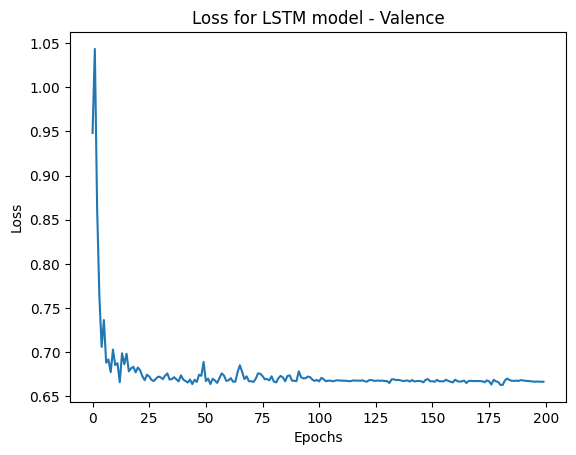

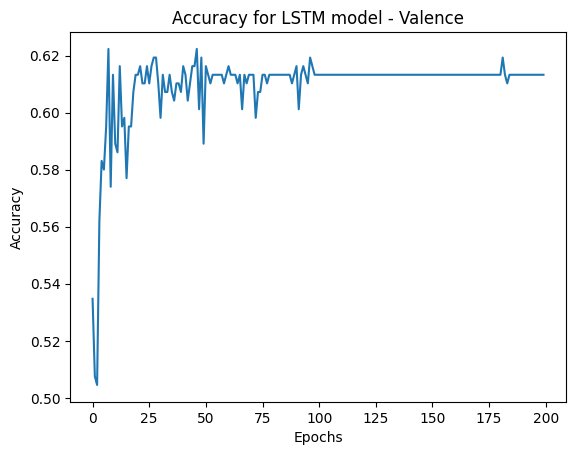

In [ ]:
 plt.plot(history.history['loss'])
 plt.title("Loss for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history.history['accuracy'])
 plt.title("Accuracy for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()

Ce code crée un modèle de réseau de neurones à convolution (CNN) pour une classification multiclasse. Le modèle est créé à l'aide de la classe Sequential de Keras, qui permet de créer un modèle linéaire de couches. Le modèle comprend une couche d'aplatissement (flatten) qui transforme l'entrée en un vecteur 1D, deux couches denses (fully connected) avec une fonction d'activation relu, une couche de dropout pour éviter le surapprentissage et une couche dense de sortie avec une fonction d'activation softmax pour prédire les probabilités pour chaque classe

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(128,activation =tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128,activation =tf.nn.relu))
model.add(Dense(5,activation =tf.nn.softmax))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer =opt ,metrics=['accuracy'])
history_CNN = model.fit(x_Train,y_Train,epochs=200, validation_data =(x_Test,y_Test))

Epoch 1/200
11/11 [==============================] - 3s 124ms/step - loss: 5.2484 - accuracy: 0.4864 - val_loss: 3.7370 - val_accuracy: 0.3976
Epoch 2/200
11/11 [==============================] - 1s 87ms/step - loss: 3.0290 - accuracy: 0.5680 - val_loss: 0.6793 - val_accuracy: 0.6024
Epoch 3/200
11/11 [==============================] - 1s 87ms/step - loss: 1.6290 - accuracy: 0.5347 - val_loss: 1.2870 - val_accuracy: 0.3976
Epoch 4/200
11/11 [==============================] - 1s 84ms/step - loss: 1.2171 - accuracy: 0.5408 - val_loss: 0.7501 - val_accuracy: 0.3976
Epoch 5/200
11/11 [==============================] - 1s 88ms/step - loss: 0.9483 - accuracy: 0.5166 - val_loss: 0.7137 - val_accuracy: 0.6024
Epoch 6/200
11/11 [==============================] - 1s 59ms/step - loss: 0.8771 - accuracy: 0.5468 - val_loss: 0.8908 - val_accuracy: 0.3976
Epoch 7/200
11/11 [==============================] - 1s 57ms/step - loss: 0.8561 - accuracy: 0.5589 - val_loss: 0.7293 - val_accuracy: 0.3976
Epoch

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 31232)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               3997824   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4,014,981
Trainable params: 4,014,981
Non-trainable params: 0
_________________________________________________________________


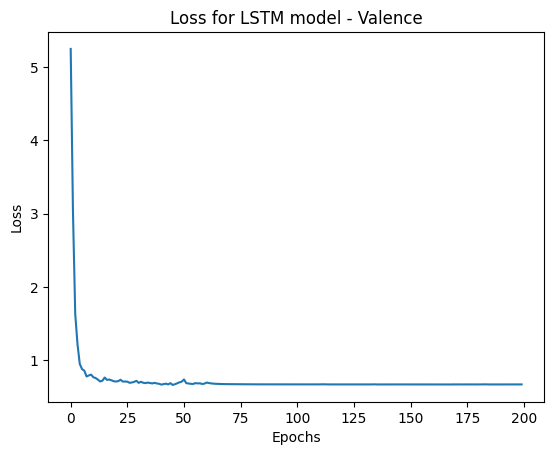

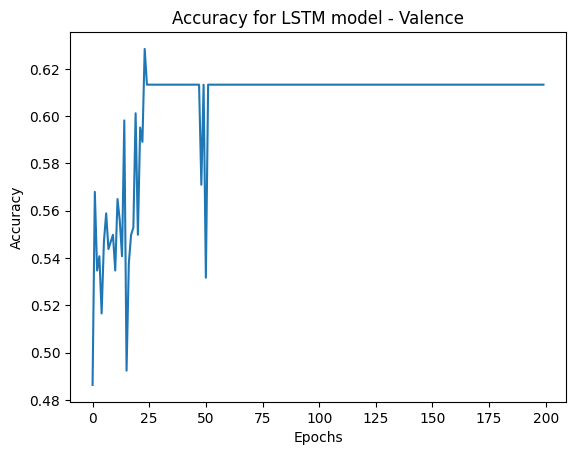

In [ ]:
 plt.plot(history_CNN.history['loss'])
 plt.title("Loss for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history_CNN.history['accuracy'])
 plt.title("Accuracy for LSTM model - Valence")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()

In [ ]:
target=ecg_data['arousalhigh']

In [ ]:
from sklearn.model_selection import train_test_split
ecg_stim_data = np.array(ecg_stim_data, dtype = float)
target = np.array(target, dtype = float)

In [ ]:
x_Train, x_Test, y_Train, y_Test = train_test_split(ecg_stim_data, target, test_size = 0.2, random_state = 6)

x_Train = x_Train.reshape(x_Train.shape[0],1,31232)
x_Test = x_Test.reshape(x_Test.shape[0],1,31232)

Fonction de rappel (callback) qui arrête l'entraînement une fois que l'exactitude (accuracy) atteint 80% et que l'exactitude de validation atteint 65%

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.8 and logs.get('val_accuracy') > 0.65:
            self.model.stop_training = True

Dans ce code, un modèle de réseaux de neurones LSTM est créé en utilisant la bibliothèque Keras. Le modèle est composé de deux couches LSTM, chacune suivie d'une couche de régularisation Dropout pour réduire le surapprentissage. Ensuite, deux couches denses avec les fonctions d'activation relu et sigmoid sont ajoutées. Le modèle est compilé avec la fonction de perte "sparse_categorical_crossentropy" et l'optimiseur Adam avec un taux d'apprentissage de 1e-3.

Le modèle est entraîné avec le jeu de données d'apprentissage "x_Train" et "y_Train" pour un maximum de 200 époques, avec une taille de lot de 16. Le jeu de données de validation "x_Test" et "y_Test" est également fourni pour évaluer les performances du modèle après chaque époque. En outre, un objet CustomCallback() est ajouté en tant que callback pour interrompre l'entraînement une fois que la précision de l'apprentissage dépasse 80% et que la précision de validation dépasse 65%.

In [ ]:
model = Sequential()
model.add(LSTM(128,activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation ='relu'))
model.add(Dense(2,activation ='sigmoid'))
y_pred = model.predict(x_Test)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer =opt,metrics=['accuracy'])
history = model.fit(x_Train,y_Train,batch_size=16,epochs=200, validation_data =(x_Test,y_Test),callbacks=[CustomCallback()])

3/3 [==============================] - 1s 28ms/step
Epoch 1/200
21/21 [==============================] - 11s 382ms/step - loss: 1.3720 - accuracy: 0.5861 - val_loss: 0.8774 - val_accuracy: 0.6988
Epoch 2/200
21/21 [==============================] - 6s 299ms/step - loss: 0.9987 - accuracy: 0.6284 - val_loss: 0.6935 - val_accuracy: 0.6988
Epoch 3/200
21/21 [==============================] - 7s 325ms/step - loss: 0.7806 - accuracy: 0.6707 - val_loss: 0.6279 - val_accuracy: 0.6988
Epoch 4/200
21/21 [==============================] - 7s 338ms/step - loss: 0.6858 - accuracy: 0.6707 - val_loss: 0.6162 - val_accuracy: 0.6988
Epoch 5/200
21/21 [==============================] - 6s 296ms/step - loss: 0.6306 - accuracy: 0.7100 - val_loss: 0.6187 - val_accuracy: 0.6988
Epoch 6/200
21/21 [==============================] - 8s 368ms/step - loss: 0.6358 - accuracy: 0.7100 - val_loss: 0.6178 - val_accuracy: 0.6988
Epoch 7/200
21/21 [==============================] - 6s 285ms/step - loss: 0.5898 - accur

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 128)            16056832  
                                                                 
 dropout_10 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 16,108,386
Trainable params: 16,108,386


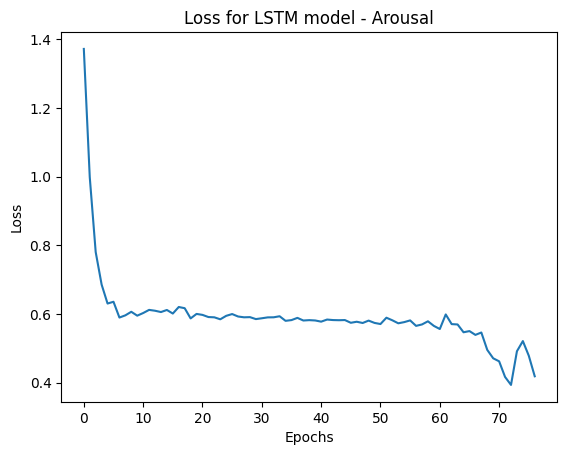

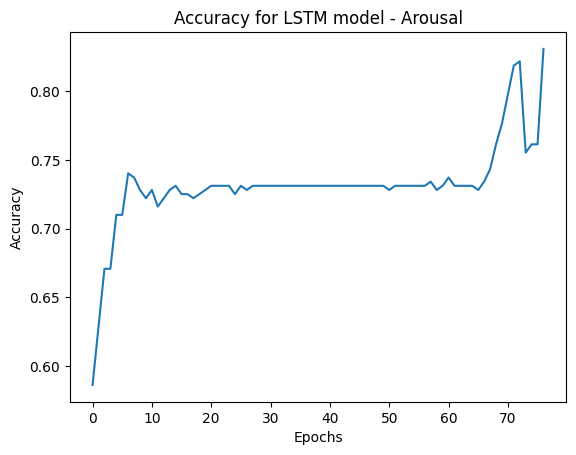

In [ ]:
 plt.plot(history.history['loss'])
 plt.title("Loss for LSTM model - Arousal")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.show()
 plt.plot(history.history['accuracy'])
 plt.title("Accuracy for LSTM model - Arousal")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.show()